In [ ]:
!pip install rdkit
!pip install pandas
!pip install openpyxl
!pip install numpy
!pip install matPlotLib

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit import DataStructs

#таблица с имеющимися данными с посчитанными свойствами
xl1 = pd.ExcelFile('C:/Users/User/Downloads/1400.xlsx')
df1 = xl1.parse('Smile-IC50-CC50')

#таблица с данными, для которых нужно посчитать свойства 
xl2 = pd.ExcelFile('C:/Users/User/Downloads/35000.xlsx')
df2 = xl2.parse('Sheet1')

In [ ]:
h = 0
bins = list()
listOfDicts = list()
#
for s1 in df1["SMILES"]:
    fp2 = Chem.RDKFingerprint(Chem.MolFromSmiles(s1))
    bins.append(fp2)

# Для каждой молекулы находим взаимосвязи с остальными молекулами
for s in df2["SMILES"]:
    mol1 = Chem.MolFromSmiles(s)
    fp1 = Chem.RDKFingerprint(mol1)
    d = dict()
    cnt = -1
    # Проверяем их схожесть по Танимото, сравнивая отпечатки
    for fp2 in bins:
        cnt+=1
        d[DataStructs.TanimotoSimilarity(fp1, fp2)] = cnt
    # Сортируем данные
    sorted_dict = sorted(d.items(),key=lambda x: x[0], reverse=True)
    cnt = 0
    lst = list()
    # Выбираем самые похожие молекулы
    for key,num in sorted_dict:
        if (cnt>10):
            break
        lst.append((key,num))
        cnt+=1
    # Добавляем данные для нашей молекулы
    listOfDicts.append(lst)
    

In [ ]:
import openpyxl

# Создаем таблицу для записи результатов
workbook = openpyxl.Workbook()
sheet = workbook.active

# Считаем ответ для каждой молекулы из ~36000
for i in range(len(listOfDicts)):
    ans = 0
    for x,y in listOfDicts[i]:
        ans+=df1["CC50-MDCK, mmg/ml"][y]
    ans/=len(listOfDicts[i])
    sheet['B' + str(i+2)] = ans
    sheet['A' + str(i+2)] = df2["SMILES"][i]
    
# Сохраняем таблицу с результатами
workbook.save('C:/Users/User/Downloads/results4.0.xlsx')


In [ ]:
import openpyxl
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Находя уже известное значение IC50 для всех молекул, находим метрику нашей модели

# Считываем полученные результаты
data = pd.read_excel('C:/Users/User/Downloads/results4.0.xlsx')
y_true = []
y_pred = []
# Считываем предсказание
for value in data["Unnamed: 1"]:
    y_pred.append(value)
# Считываем верный ответ
for x in df2['IC50']:
    y_true.append(x)

# Считаем MAE
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

# Считаем MSE
mse = mean_squared_error(y_true, y_pred)
print("MSE:", mse)

# Считаем R-squared
r2 = abs(r2_score(y_true, y_pred))
print("R-squared:", r2)

# Считаем среднеквадратичное отклонение (Standard Deviation - STD)
y_a = np.array(y_true)  # Вектор правильных ответов
y_b = np.array(y_pred)  # Вектор предсказанных ответов
std = np.std(y_a - y_b)
print("STD:", std)

# Считаем RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)


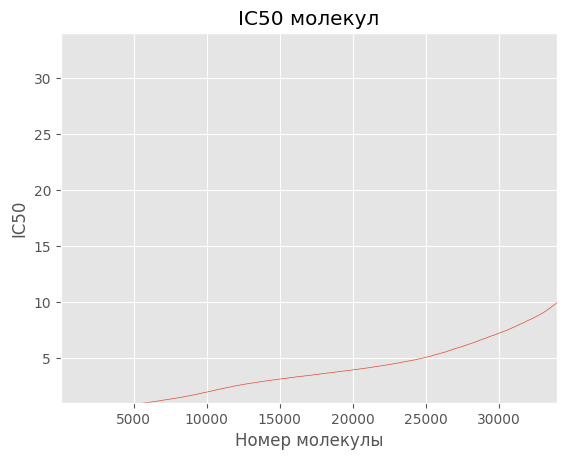

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


url = 'C:/Users/User/Downloads/resultss.xlsx'

df = pd.read_excel(url)

fig, ax = plt.subplots()

# Построение полного графика
ax.plot(df[0], df['IC50 real'],linewidth = .5)

# Задание диапазона значений по осям x и y
ax.set_xlim(1, 34000)  # Ось x из диапазона [1, 34000]
ax.set_ylim(1, 34)
plt.xlabel('Номер молекулы')
plt.ylabel('IC50')
plt.title('IC50 молекул')
plt.grid(True)
plt.show()


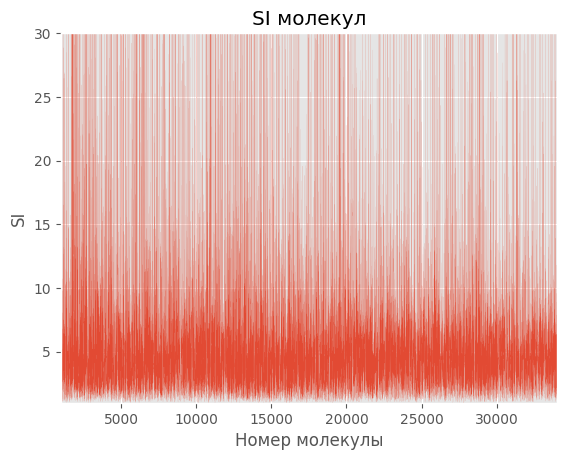

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


url = 'C:/Users/User/Downloads/resultss.xlsx'

df = pd.read_excel(url)

fig, ax = plt.subplots()

# Построение полного графика
ax.plot(df[0], df['SI prediction'],linewidth = .05)

# Задание диапазона значений по осям x и y
ax.set_xlim(1000, 34000)  # Ось x из диапазона [1, 34000]
ax.set_ylim(1, 30)
plt.xlabel('Номер молекулы')
plt.ylabel('SI')
plt.title('SI молекул')
plt.grid(True)
plt.show()